In [17]:
import numpy as np
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('/Users/pahulpreetsingh/Downloads/DIC/Project/bank_user_data.csv')

In [19]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [20]:
df_train = df.copy(deep=True)

In [21]:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,TenureByAge,BalanceSalaryRatio,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,0.000000,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,0.744677,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,1.401375,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,0.000000,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,1.587055,19.767442


In [22]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [23]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [24]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

/var/folders/mf/4xz0t1v57dd24kxr62jgbgxm0000gn/T/ipykernel_13944/366624441.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
/var/folders/mf/4xz0t1v57dd24kxr62jgbgxm0000gn/T/ipykernel_13944/366624441.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
/var/folders/mf/4xz0t1v57dd2

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,-1,-1,1,-1
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,-1,1,-1,1,-1
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,-1,-1,1,-1
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,-1,1,-1,1,-1


In [25]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.000000,0.085714,0.235083,1,1,1,-1,-1,1,-1
1,0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.000070,0.043902,0.237252,-1,1,-1,1,-1,1,-1
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.000132,0.342857,0.168807,1,-1,1,-1,-1,1,-1
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.000000,0.046154,0.310859,-1,-1,1,-1,-1,1,-1
4,0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.000150,0.083721,0.354739,1,1,-1,1,-1,1,-1


In [26]:
#preparing data for split and prediction
features = df_train.drop(['Exited'], axis = 1)
predict = df_train['Exited']

In [27]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split 
from sklearn.inspection import permutation_importance
from sklearn import metrics as metrics

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [28]:
#split tha data
X_train, X_test, y_train, y_test = train_test_split(features, predict, test_size = 0.2,random_state = 200)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8000 samples.
Testing set has 2000 samples.


In [29]:
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.000000,0.085714,0.235083,1,1,1,-1,-1,1,-1
1,0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.000070,0.043902,0.237252,-1,1,-1,1,-1,1,-1
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.000132,0.342857,0.168807,1,-1,1,-1,-1,1,-1
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.000000,0.046154,0.310859,-1,-1,1,-1,-1,1,-1
4,0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.000150,0.083721,0.354739,1,1,-1,1,-1,1,-1


Logistic Regression

In [30]:
# using Logistic Regresiion algorithm to build first model
logreg_model = LogisticRegression(random_state=42, C=0.8, solver='liblinear')
fit = logreg_model.fit(X_train, y_train)
fit_prediction_train = fit.predict(X_train)
fit_prediction_test = fit.predict(X_test)

#validation of  Logistic Regresiion
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(fit_prediction_test, y_test)))

accuracy = accuracy_score(fit_prediction_test, y_test)

f1 = f1_score(fit_prediction_test, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, fit.predict(X_test)).ravel()

specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Specificity', specificity)
print('Sensitivity', sensitivity)
print('F1', f1)

Accuracy Score for testing set :0.7935
Specificity 0.9618563254926892
Sensitivity 0.17330210772833723
F1 0.2638146167557932


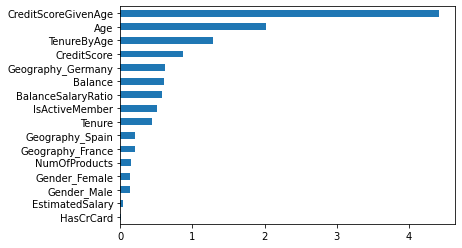

In [31]:
feat_importances = pd.Series(abs(logreg_model.coef_[0]), index=X_train.columns)
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.plot(kind='barh').invert_yaxis()

AUC 0.7631593443814009


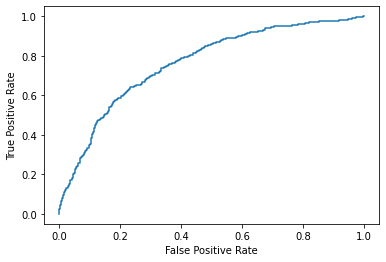

In [32]:
y_pred_proba = fit.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
print('AUC', auc)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
filename = '/Users/pahulpreetsingh/Downloads/DIC/Project/data/lr_nosmote_model.sav'
with open(filename,"wb") as f:
    pickle.dump(fit, f)
    pickle.dump(accuracy, f)
    pickle.dump(f1, f)
    pickle.dump(specificity, f)
    pickle.dump(sensitivity, f)
    pickle.dump(auc, f)
    pickle.dump(feat_importances, f)
    pickle.dump(fpr, f)
    pickle.dump(tpr, f)

Random Forest

In [34]:
# using RandomForestClassifier algorithm to to fit it on the resampled data

rf = RandomForestClassifier(n_jobs=-1, n_estimators=400, max_depth=6)
rf_fit = rf.fit(X_train, y_train)
rf_prediction_train_ = rf_fit.predict(X_train)
rf_prediction_test = rf_fit.predict(X_test)

#validation of RandomForestClassifier
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(rf_prediction_test, y_test)))
accuracy = accuracy_score(rf_prediction_test, y_test)

f1 = f1_score(rf_prediction_test, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, rf_fit.predict(X_test)).ravel()

specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Specificity', specificity)
print('Sensitivity', sensitivity)
print('F1', f1)

Accuracy Score for testing set :0.844
Specificity 0.9771137952956135
Sensitivity 0.35362997658079626
F1 0.4918566775244299


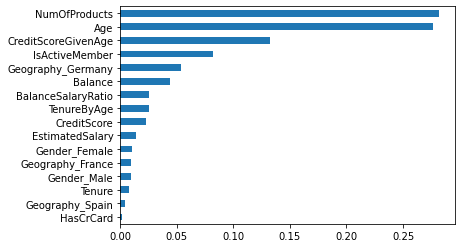

In [35]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.plot(kind='barh').invert_yaxis()

AUC 0.8315633695663502


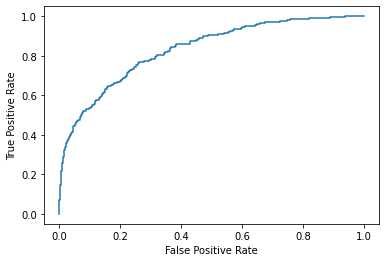

In [36]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
print('AUC', auc)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
filename = '/Users/pahulpreetsingh/Downloads/DIC/Project/data/rf_nosmote_model.sav'
with open(filename,"wb") as f:
    pickle.dump(rf_fit, f)
    pickle.dump(accuracy, f)
    pickle.dump(f1, f)
    pickle.dump(specificity, f)
    pickle.dump(sensitivity, f)
    pickle.dump(auc, f)
    pickle.dump(feat_importances, f)
    pickle.dump(fpr, f)
    pickle.dump(tpr, f)

Extreme Gradient Boosting

In [38]:
gb = XGBClassifier(n_jobs=-1, random_state=42, n_estimators=200, max_depth=3, learning_rate=0.1, eval_metric='logloss')
gb_fit = gb.fit(X_train, y_train)
gb_prediction_train_ = gb_fit.predict(X_train)
gb_prediction_test = gb_fit.predict(X_test)

#validation of GradientBoostingClassifier
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(gb_prediction_test, y_test)))

accuracy = accuracy_score(gb_prediction_test, y_test)
f1 = f1_score(gb_prediction_test, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, gb_fit.predict(X_test)).ravel()

specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Specificity', specificity)
print('Sensitivity', sensitivity)
print('F1', f1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Accuracy Score for testing set :0.852
Specificity 0.9637635092180546
Sensitivity 0.44028103044496486
F1 0.5595238095238095


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


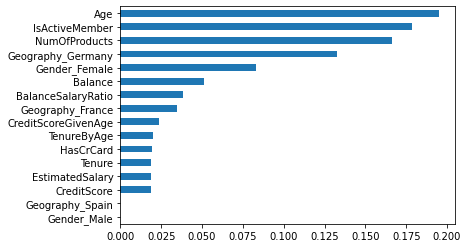

In [39]:
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.plot(kind='barh').invert_yaxis()

AUC 0.8426714864866877


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


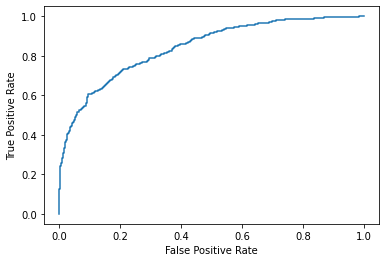

In [40]:
y_pred_proba = gb.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
print('AUC', auc)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
filename = '/Users/pahulpreetsingh/Downloads/DIC/Project/data/xgb_nosmote_model.sav'
with open(filename,"wb") as f:
    pickle.dump(gb_fit, f)
    pickle.dump(accuracy, f)
    pickle.dump(f1, f)
    pickle.dump(specificity, f)
    pickle.dump(sensitivity, f)
    pickle.dump(auc, f)
    pickle.dump(feat_importances, f)
    pickle.dump(fpr, f)
    pickle.dump(tpr, f)

In [42]:
svm = SVC(random_state=42, C=1, kernel='poly', degree=4, probability=True)
svm_fit = svm.fit(X_train, y_train)
svm_prediction_train_ = svm_fit.predict(X_train)
svm_prediction_test = svm_fit.predict(X_test)

#validation of GradientBoostingClassifier
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(svm_prediction_test, y_test)))

accuracy = accuracy_score(svm_prediction_test, y_test)

f1 = f1_score(svm_prediction_test, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, svm_fit.predict(X_test)).ravel()

specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Specificity', specificity)
print('Sensitivity', sensitivity)
print('F1', f1)

Accuracy Score for testing set :0.8025
Specificity 0.9879211697393515
Sensitivity 0.11943793911007025
F1 0.20523138832997986


Running all models after smote

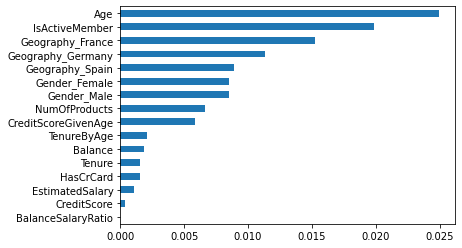

In [43]:
perm_importance = permutation_importance(svm, X_train, y_train)
features = np.array(X_train.columns)
sorted_idx = perm_importance.importances_mean.argsort()
feat_importances = pd.Series(abs(perm_importance.importances_mean[sorted_idx]), index=features[sorted_idx])
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.plot(kind='barh').invert_yaxis()

AUC 0.7508423022580996


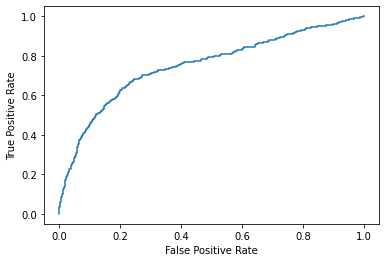

In [44]:
y_pred_proba = svm.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
print('AUC', auc)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
filename = '/Users/pahulpreetsingh/Downloads/DIC/Project/data/svm_nosmote_model.sav'
with open(filename,"wb") as f:
    pickle.dump(svm_fit, f)
    pickle.dump(accuracy, f)
    pickle.dump(f1, f)
    pickle.dump(specificity, f)
    pickle.dump(sensitivity, f)
    pickle.dump(auc, f)
    pickle.dump(feat_importances, f)
    pickle.dump(fpr, f)
    pickle.dump(tpr, f)

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

SVM

In [47]:
svm = SVC(random_state=42, C=1, kernel='poly', degree=4, probability=True)
svm_fit = svm.fit(X_train_res, y_train_res)
svm_prediction_train_ = svm_fit.predict(X_train_res)
svm_prediction_test = svm_fit.predict(X_test)

#validation of GradientBoostingClassifier
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(svm_prediction_test, y_test)))

svm_accuracy = accuracy_score(svm_prediction_test, y_test)

svm_f1 = f1_score(svm_prediction_test, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, svm_fit.predict(X_test)).ravel()

svm_specificity = tn / (tn+fp)
svm_sensitivity = tp / (tp+fn)
print('Specificity', svm_specificity)
print('Sensitivity', svm_sensitivity)
print('F1', f1)

Accuracy Score for testing set :0.7185
Specificity 0.7310870947234583
Sensitivity 0.6721311475409836
F1 0.20523138832997986


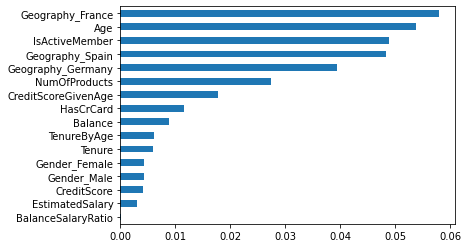

In [48]:
perm_importance = permutation_importance(svm, X_train_res, y_train_res)
features = np.array(X_train_res.columns)
sorted_idx = perm_importance.importances_mean.argsort()
feat_importances = pd.Series(abs(perm_importance.importances_mean[sorted_idx]), index=features[sorted_idx])
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.plot(kind='barh').invert_yaxis()

AUC 0.7647791850474414


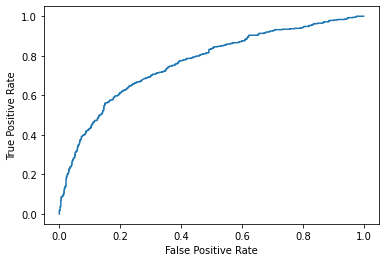

In [49]:
y_pred_proba = svm.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
print('AUC', auc)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
filename = '/Users/pahulpreetsingh/Downloads/DIC/Project/data/svm_model.sav'
with open(filename,"wb") as f:
    pickle.dump(svm_fit, f)
    pickle.dump(svm_accuracy, f)
    pickle.dump(svm_f1, f)
    pickle.dump(svm_specificity, f)
    pickle.dump(svm_sensitivity, f)
    pickle.dump(auc, f)
    pickle.dump(feat_importances, f)
    pickle.dump(fpr, f)
    pickle.dump(tpr, f)

Extreme Gradient Boost

In [51]:
gb = XGBClassifier(n_jobs=-1, random_state=42, n_estimators=200, max_depth=3, learning_rate=0.1, eval_metric='logloss')
gb_fit = gb.fit(X_train_res, y_train_res)
gb_prediction_train_ = gb_fit.predict(X_train_res)
gb_prediction_test = gb_fit.predict(X_test)

#validation of GradientBoostingClassifier
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(gb_prediction_test, y_test)))

xgb_accuracy = accuracy_score(gb_prediction_test, y_test)

xgb_f1 = f1_score(gb_prediction_test, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, gb_fit.predict(X_test)).ravel()

xgb_specificity = tn / (tn+fp)
xgb_sensitivity = tp / (tp+fn)
print('Specificity', xgb_specificity)
print('Sensitivity', xgb_sensitivity)
print('F1', f1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Accuracy Score for testing set :0.8385
Specificity 0.9033693579148124
Sensitivity 0.5995316159250585
F1 0.20523138832997986


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


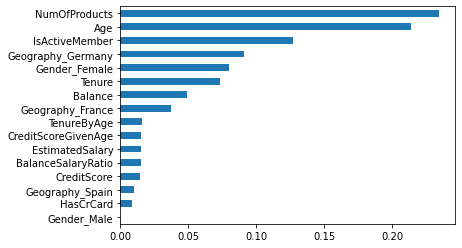

In [52]:
feat_importances = pd.Series(gb.feature_importances_, index=X_train_res.columns)
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.plot(kind='barh').invert_yaxis()

AUC 0.847164013333909


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


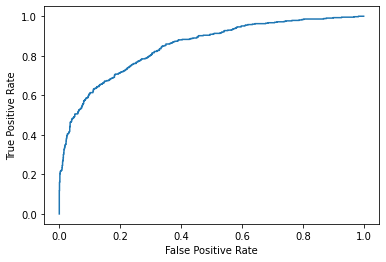

In [53]:
y_pred_proba = gb.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
print('AUC', auc)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
filename = '/Users/pahulpreetsingh/Downloads/DIC/Project/data/xgb_model.sav'
with open(filename,"wb") as f:
    pickle.dump(gb_fit, f)
    pickle.dump(xgb_accuracy, f)
    pickle.dump(xgb_f1, f)
    pickle.dump(xgb_specificity, f)
    pickle.dump(xgb_sensitivity, f)
    pickle.dump(auc, f)
    pickle.dump(feat_importances, f)
    pickle.dump(fpr, f)
    pickle.dump(tpr, f)

In [55]:
# using RandomForestClassifier algorithm to to fit it on the resampled data
rf = RandomForestClassifier(n_estimators=400, n_jobs=-1, max_depth=6)
rf_fit = rf.fit(X_train_res, y_train_res)
rf_prediction_train_ = rf_fit.predict(X_train_res)
rf_prediction_test = rf_fit.predict(X_test)

#validation of RandomForestClassifier
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(rf_prediction_test, y_test)))

rf_accuracy = accuracy_score(rf_prediction_test, y_test)

rf_f1 = f1_score(rf_prediction_test, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, rf_fit.predict(X_test)).ravel()

rf_specificity = tn / (tn+fp)
rf_sensitivity = tp / (tp+fn)
print('Specificity', rf_specificity)
print('Sensitivity', rf_sensitivity)
print('F1', f1)

Accuracy Score for testing set :0.78
Specificity 0.803560076287349
Sensitivity 0.6932084309133489
F1 0.20523138832997986


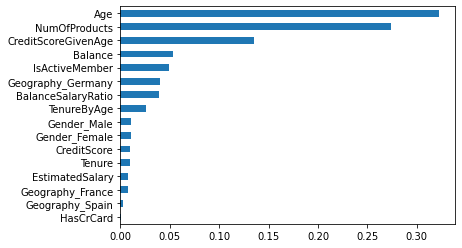

In [56]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train_res.columns)
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.plot(kind='barh').invert_yaxis()

AUC 0.8315723025111997


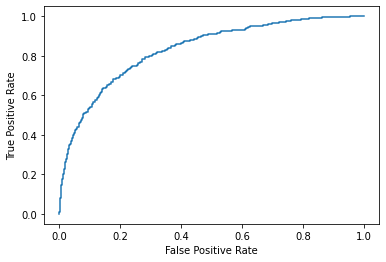

In [57]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
print('AUC', auc)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
filename = '/Users/pahulpreetsingh/Downloads/DIC/Project/data/rf_model.sav'
with open(filename,"wb") as f:
    pickle.dump(rf_fit, f)
    pickle.dump(rf_accuracy, f)
    pickle.dump(rf_f1, f)
    pickle.dump(rf_specificity, f)
    pickle.dump(rf_sensitivity, f)
    pickle.dump(auc, f)
    pickle.dump(feat_importances, f)
    pickle.dump(fpr, f)
    pickle.dump(tpr, f)

In [59]:
# using Logistic Regresiion algorithm to build first model
logreg_model = LogisticRegression(solver='liblinear', random_state=42, C=0.8)
fit = logreg_model.fit(X_train_res, y_train_res)
fit_prediction_train = fit.predict(X_train_res)
fit_prediction_test = fit.predict(X_test)

#validation of  Logistic Regresiion
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(fit_prediction_test, y_test)))

lr_accuracy = accuracy_score(fit_prediction_test, y_test)

lr_f1 = f1_score(fit_prediction_test, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, fit.predict(X_test)).ravel()

lr_specificity = tn / (tn+fp)
lr_sensitivity = tp / (tp+fn)
print('Specificity', lr_specificity)
print('Sensitivity', lr_sensitivity)
print('F1', f1)

Accuracy Score for testing set :0.691
Specificity 0.6846789574062301
Sensitivity 0.7142857142857143
F1 0.20523138832997986


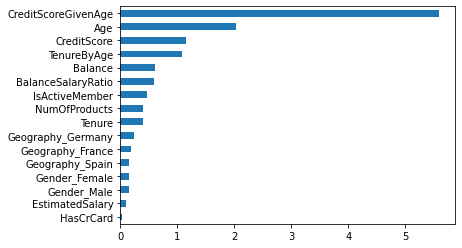

In [60]:
feat_importances = pd.Series(abs(logreg_model.coef_[0]), index=X_train_res.columns)
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.plot(kind='barh').invert_yaxis()

AUC 0.7671538595532633


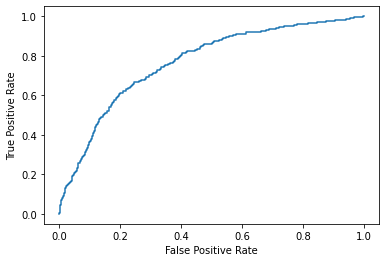

In [61]:
y_pred_proba = fit.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
print('AUC', auc)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [62]:
filename = '/Users/pahulpreetsingh/Downloads/DIC/Project/data/lr_model.sav'
with open(filename,"wb") as f:
    pickle.dump(fit, f)
    pickle.dump(lr_accuracy, f)
    pickle.dump(lr_f1, f)
    pickle.dump(lr_specificity, f)
    pickle.dump(lr_sensitivity, f)
    pickle.dump(auc, f)
    pickle.dump(feat_importances, f)
    pickle.dump(fpr, f)
    pickle.dump(tpr, f)

In [63]:
filename = '/Users/pahulpreetsingh/Downloads/DIC/Project/data/lr_model.sav'
with open(filename, "rb") as f:
    model = pickle.load(f)

print(model)

LogisticRegression(C=0.8, random_state=42, solver='liblinear')
